# MLP -- exercise

# Understanding the training loop 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


### Download the data and print the shape

In [2]:

import torchvision.datasets
import torchvision.transforms as transforms

# Apply transformations to the data points before passing them to the network
transform = transforms.Compose([transforms.ToTensor(),  # Transform the data to torch tensors of shape (28, 28, 1), corresponding to 28 * 28 pixels with 1 channel (1 value per pixel that is)
                                transforms.Lambda(lambda x: x.squeeze()),  # Squeeze the data to remove the redundant channel dimension
                                ])                                         # Note: This is only redundant because there is only one channel

# Download the MNIST train dataset (used to train the network)
trainset = torchvision.datasets.FashionMNIST(root='./data_FashionMNIST',
                                      train=True,
                                      download=True,
                                      transform=transform  # Apply the defined transformation on the data
                                      )

# Download the MNIST test dataset (used to evaluate the trained network)
testset = torchvision.datasets.FashionMNIST(root='./data_FashionMNIST',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )

classes = (
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
)



Extracting ./data_FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw


Extracting ./data_FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw




Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw


Extracting ./data_FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_FashionMNIST/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
print(trainset.data.shape)  # The trainset consists of 60000 28x28 images

torch.Size([60000, 28, 28])


### Make a ONE layer net class **without** softmax activation
We will use PyTorch's cross entropy loss function which expects the model outputs directly as it applies the softmax function internally. Therefore you only need to implement one linear layer with `input_size` number of inputs and `output_size` number of outputs.

In [4]:
class OneLayerNet(nn.Module):

    def __init__(self, input_size, output_size):
        super(OneLayerNet, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size)  # complete here
        
    def forward(self, x):
        return self.linear_layer(x)


### Build the net

In [5]:
net = OneLayerNet(784,10)
print(net)

OneLayerNet(
  (linear_layer): Linear(in_features=784, out_features=10, bias=True)
)


### Choose the criterion and the optimizer: use the CHEAT SHEET to see the correct syntax. 

### Remember that the optimizer need to have access to the parameters of the network (net.parameters()).

### Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01







In [6]:
# make the criterion
criterion = nn.CrossEntropyLoss()

# make the SGD optimizer. 
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)

# set up the batch size   
bs=50

### Create DataLoaders that sample data from the dataset


In [7]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

### Complete the training loop

In [8]:
# Every epoch you iterate once over the entire dataset
for epoch in range(1, 5):
  # The trainloader splits the train dataset into random minibatches of data
  # Iterate through all minibatches in the data set and perform gradient descent
  for i, (minibatch_data, minibatch_label) in enumerate(trainloader):
      
      # Set dL/dU, dL/dV, dL/dW to be filled with zeros
      optimizer.zero_grad()      
      
      # reshape the minibatch
      inputs = minibatch_data.view(bs,784)    

      # forward the minibatch through the net  
      outputs = net.forward(inputs)
      
      # Compute the average of the losses of the data points in the minibatch
      loss = criterion(outputs, minibatch_label)
      
      # backward pass to compute dL/dU, dL/dV and dL/dW    
      loss.backward()
      
      # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
      optimizer.step()
      

### Choose image at random from the test set and see how good/bad are the predictions

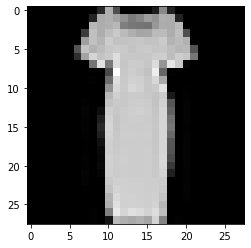

Confidence scores:
T-shirt/top : 0.0021120968740433455
Trouser     : 0.013567457906901836
Pullover    : 0.0007526052067987621
Dress       : 0.981705904006958
Coat        : 0.0009111965773627162
Sandal      : 8.760480909586477e-07
Shirt       : 0.0008466800791211426
Sneaker     : 2.5698403987917118e-05
Bag         : 1.2103854714951012e-05
Ankle boot  : 6.537811714224517e-05

Label with highest confidence score: Dress


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0], label_minibatch[0]

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob = F.softmax(net( im.view(1,784)), dim=1)  # Apply softmax to normalize the output to a probability distribution

print('Confidence scores:\n' + '\n'.join(['{:12s}: {}'.format(classes[i], p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(classes[torch.argmax(prob).item()]))
